In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

%matplotlib inline
#%load_ext cudf.pandas
#supercharges workflow with GPU acceleration using cudf.pandas
#Im having pip install issues with cudf so commenting it out for now

In [ ]:
pandas_df = pd.read_csv(r'C:\Users\admin\OneDrive\Documents\GitHub\Plotting\fifa_dataset\FIFA20_official_data.csv')
pandas_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,176580,L. Suárez,32,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,89,89,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,89.0,€108.7M,57.0
1,194765,A. Griezmann,28,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,89,89,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,49.0,14.0,8.0,14.0,13.0,14.0,CF,89.0,€141.5M,59.0
2,212198,Bruno Fernandes,24,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,86,89,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,55.0,12.0,14.0,15.0,8.0,14.0,CAM,87.0,€111.6M,72.0
3,192985,K. De Bruyne,28,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,€166.5M,68.0
4,224334,M. Acuña,27,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,82,82,Sporting CP,https://cdn.sofifa.com/teams/237/light_30.png,...,79.0,8.0,14.0,13.0,13.0,14.0,LB,82.0,€40M,79.0


In [3]:
#Diff between 17, 18 and 19 is that 18,19 have an extra column called 'Release Clause'
#20 has an extra column called 'Defensive Awareness'

## DATA STRUCTURE/SHAPE/INFO

In [4]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17104 entries, 0 to 17103
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17104 non-null  int64  
 1   Name                      17104 non-null  object 
 2   Age                       17104 non-null  int64  
 3   Photo                     17104 non-null  object 
 4   Nationality               17104 non-null  object 
 5   Flag                      17104 non-null  object 
 6   Overall                   17104 non-null  int64  
 7   Potential                 17104 non-null  int64  
 8   Club                      16716 non-null  object 
 9   Club Logo                 17104 non-null  object 
 10  Value                     17104 non-null  object 
 11  Wage                      17104 non-null  object 
 12  Special                   17104 non-null  int64  
 13  Preferred Foot            17104 non-null  object 
 14  Intern

In [5]:
pandas_df.shape

(17104, 65)

In [6]:
pandas_df.dtypes

ID                       int64
Name                    object
Age                      int64
Photo                   object
Nationality             object
                        ...   
GKReflexes             float64
Best Position           object
Best Overall Rating    float64
Release Clause          object
DefensiveAwareness     float64
Length: 65, dtype: object

In [ ]:
import polars as pl
polars_df = pl.read_csv(r'C:\Users\admin\OneDrive\Documents\GitHub\Plotting\fifa_dataset\FIFA20_official_data.csv')

In [8]:
polars_df.head(10)

ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
i64,str,i64,str,str,str,i64,i64,str,str,str,str,i64,str,f64,f64,f64,str,str,str,str,f64,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,str,f64,str,str
176580,""" L. Suárez""",32,"""https://cdn.sofifa.com/players…","""Uruguay""","""https://cdn.sofifa.com/flags/u…",89,89,"""FC Barcelona""","""https://cdn.sofifa.com/teams/2…","""€53M""","""€350K""",2327,"""Right""",5.0,4.0,3.0,"""High/ Medium""","""Normal (170-185)""","""Yes""","""<span class=""pos pos25"">ST""",9.0,"""Jul 11, 2014""","""nan""","""2021""","""6'0""","""190lbs""",80.0,91.0,83.0,82.0,90.0,85.0,86.0,82.0,77.0,84.0,76.0,70.0,79.0,92.0,79.0,88.0,69.0,82.0,86.0,86.0,87.0,41.0,92.0,84.0,83.0,"""85.0""","""nan""",45.0,38.0,27.0,25.0,31.0,33.0,37.0,"""ST""",89.0,"""€108.7M""","""57.0"""
194765,""" A. Griezmann""",28,"""https://cdn.sofifa.com/players…","""France""","""https://cdn.sofifa.com/flags/f…",89,89,"""FC Barcelona""","""https://cdn.sofifa.com/teams/2…","""€69M""","""€370K""",2299,"""Left""",4.0,3.0,4.0,"""High/ High""","""Normal (170-185)""","""Yes""","""<span class=""pos pos27"">LW""",17.0,"""Jul 12, 2019""","""nan""","""2024""","""5'9""","""161lbs""",83.0,89.0,84.0,85.0,87.0,88.0,86.0,85.0,82.0,90.0,82.0,79.0,90.0,92.0,83.0,82.0,90.0,87.0,63.0,83.0,73.0,49.0,90.0,86.0,86.0,"""89.0""","""nan""",54.0,49.0,14.0,8.0,14.0,13.0,14.0,"""CF""",89.0,"""€141.5M""","""59.0"""
212198,""" Bruno Fernandes""",24,"""https://cdn.sofifa.com/players…","""Portugal""","""https://cdn.sofifa.com/flags/p…",86,89,"""Manchester United""","""https://cdn.sofifa.com/teams/1…","""€56.5M""","""€165K""",2299,"""Right""",2.0,4.0,4.0,"""High/ High""","""Lean (170-185)""","""No""","""<span class=""pos pos18"">CAM""",18.0,"""Jan 30, 2020""","""nan""","""2025""","""5'10""","""152lbs""",87.0,77.0,58.0,86.0,86.0,85.0,86.0,87.0,87.0,87.0,79.0,77.0,80.0,84.0,79.0,89.0,72.0,94.0,67.0,89.0,70.0,74.0,83.0,88.0,90.0,"""86.0""","""nan""",68.0,55.0,12.0,14.0,15.0,8.0,14.0,"""CAM""",87.0,"""€111.6M""","""72.0"""
192985,""" K. De Bruyne""",28,"""https://cdn.sofifa.com/players…","""Belgium""","""https://cdn.sofifa.com/flags/b…",91,91,"""Manchester City""","""https://cdn.sofifa.com/teams/1…","""€90M""","""€370K""",2289,"""Right""",4.0,5.0,4.0,"""High/ High""","""Normal (170-185)""","""Yes""","""<span class=""pos pos13"">RCM""",17.0,"""Aug 30, 2015""","""nan""","""2023""","""5'11""","""154lbs""",94.0,82.0,55.0,92.0,82.0,87.0,85.0,83.0,91.0,91.0,77.0,76.0,78.0,91.0,76.0,91.0,63.0,89.0,74.0,90.0,76.0,63.0,88.0,94.0,82.0,"""91.0""","""nan""",62.0,53.0,15.0,13.0,5.0,10.0,13.0,"""CAM""",91.0,"""€166.5M""","""68.0"""
224334,""" M. Acuña""",27,"""https://cdn.sofifa.com/players…","""Argentina""","""https://cdn.sofifa.com/flags/a…",82,82,"""Sporting CP""","""https://cdn.sofifa.com/teams/2…","""€20M""","""€19K""",2285,"""Left""",2.0,3.0,4.0,"""High/ High""","""Stocky (170-185)""","""No""","""<span class=""pos pos15"">LCM""",8.0,"""nan""","""nan""","""nan""","""5'8""","""152lbs""",87.0,66.0,57.0,81.0,68.0,87.0,88.0,78.0,78.0,87.0,78.0,75.0,83.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,78.0,81.0,82.0,76.0,"""87.0""","""nan""",82.0,79.0,8.0,14.0,13.0,13.0,14.0,"""LB""",82.0,"""€40M""","""79.0"""
212462,""" Alex Telles""",26,"""https://cdn.sofifa.com/pl

In [9]:
polars_df.shape

(17104, 65)

In [10]:
polars_df.dtypes

[Int64,
 String,
 Int64,
 String,
 String,
 String,
 Int64,
 Int64,
 String,
 String,
 String,
 String,
 Int64,
 String,
 Float64,
 Float64,
 Float64,
 String,
 String,
 String,
 String,
 Float64,
 String,
 String,
 String,
 String,
 String,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 String,
 String,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 String,
 Float64,
 String,
 String]

In [11]:
from skimpy import skim
skim(pandas_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17104  │ │ float64     │ 40    │                                                          │
│ │ Number of columns │ 65     │ │ string      │ 20    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column        ┃ NA    ┃ NA %          ┃ mean   ┃ sd     ┃ p0  ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ID            │     0 │             0 │ 222100 │  33360 │  16 │ 210400 │ 230300 │ 243600 │ 256500 │     ▃▇ │  │
│ │ Age           │     0 │             0 │  24.17 │  4.744 │  16 │     20 │     23 │     27 │     47 │  ▇▇▅▂  │  │
│ │ Overall       │     0 │             0 │  66.42 │  7.378 │  28 │     61 │     66 │     72 │     94 │   ▃▇▃  │  │
│ │ Potential     │     0 │             0 │  72.41 │  6.094 │  38 │     68 │     72 │     76 │     95 │   ▃▇▅  │  │
│ │ Special       │     0 │             0 │   1611 │  269.5 │ 571 │   1463 │   1639 │   1798 │   2327 │  ▁▃▇▅▁ │  │
│ │ International │     0 │             0 │   1.14 │ 0.4472 │   1 │      1 │      1 │      1 │      5 │   ▇▁   │  │
│ │ Reputation    │       │               │        │        │     │        │        │        │        │        │  │
│ │ Weak Foot     │     0 │             0 │  2.966 │ 0.6648 │   1 │      3 │      3 │      3 │      5 │  ▃ ▇▂  │  │
│ │ Skill Moves   │     0 │             0 │   2.42 │ 0.7751 │   1 │      2 │      2 │      3 │      5 │ ▂▇ ▆▁  │  │
│ │ Jersey Number │    19 │ 0.11108512628 │  21.66 │  17.51 │   1 │      9 │     19 │     28 │     99 │  ▇▆▂   │  │
│ │               │       │        624884 │        │        │     │        │        │        │        │        │  │
│ │ Crossing      │     0 │             0 │  50.71 │  18.01 │   6 │     39 │     55 │     64 │     94 │ ▂▃▅▇▅  │  │
│ │ Finishing     │     0 │             0 │  47.05 │  19.45 │   3 │     32 │     51 │     63 │     95 │ ▂▅▅▇▅  │  │
│ │ HeadingAccura │     0 │             0 │   52.8 │  16.99 │   6 │     45 │     56 │     65 │     93 │ ▂▁▅▇▅▁ │  │
│ │ cy            │       │               │        │        │     │        │        │        │        │        │  │
│ │ ShortPassing  │     0 │             0 │   59.6 │  14.38 │   7 │     54 │     63 │     69 │     93 │  ▁▂▇▇▁ │  │
│ │ Volleys       │    39 │ 0.22801683816 │  44.02 │  17.71 │   3 │     31 │     45 │     58 │     90 │ ▂▅▇▇▅▁ │  │
│ │               │       │        651075 │        │        │     │        │        │        │        │        │  │
│ │ Dribbling     │     0 │             0 │  57.03 │   18.4 │   4 │     51 │     62 │     69 │     97 │ ▂▁▂▇▇  │  │
│ │ Curve         │    39 │ 0.22801683816 │  48.49 │  18.21 │   4 │     36 │     50 │     63 │     94 │ ▂▃▇▇▅▁ │  │
│ │               │       │        651075 │        │        │     │        │        │        │        │        │  │
│ │ FKAccuracy    │     0 │             0 │   43.4 │  17

In [12]:
#skimpy supports polars dataframes as well
skim(polars_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17104  │ │ float64     │ 37    │                                                          │
│ │ Number of columns │ 65     │ │ string      │ 23    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column         ┃ NA ┃ NA %            ┃ mean   ┃ sd     ┃ p0  ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ID             │  0 │               0 │ 222100 │  33360 │  16 │ 210400 │ 230300 │ 243600 │ 256500 │     ▃▇ │  │
│ │ Age            │  0 │               0 │  24.17 │  4.744 │  16 │     20 │     23 │     27 │     47 │  ▇▇▅▂  │  │
│ │ Overall        │  0 │               0 │  66.42 │  7.378 │  28 │     61 │     66 │     72 │     94 │   ▃▇▃  │  │
│ │ Potential      │  0 │               0 │  72.41 │  6.094 │  38 │     68 │     72 │     76 │     95 │   ▃▇▅  │  │
│ │ Special        │  0 │               0 │   1611 │  269.5 │ 571 │   1463 │   1639 │   1798 │   2327 │  ▁▃▇▅▁ │  │
│ │ International  │  0 │               0 │   1.14 │ 0.4472 │   1 │      1 │      1 │      1 │      5 │   ▇▁   │  │
│ │ Reputation     │    │                 │        │        │     │        │        │        │        │        │  │
│ │ Weak Foot      │  0 │               0 │  2.966 │ 0.6648 │   1 │      3 │      3 │      3 │      5 │  ▃ ▇▂  │  │
│ │ Skill Moves    │  0 │               0 │   2.42 │ 0.7751 │   1 │      2 │      2 │      3 │      5 │ ▂▇ ▆▁  │  │
│ │ Jersey Number  │ 19 │ 0.1110851262862 │  21.66 │  17.51 │   1 │      9 │     19 │     28 │     99 │  ▇▆▂   │  │
│ │                │    │            4884 │        │        │     │        │        │        │        │        │  │
│ │ Crossing       │  0 │               0 │  50.71 │  18.01 │   6 │     39 │     55 │     64 │     94 │ ▂▃▅▇▅  │  │
│ │ Finishing      │  0 │               0 │  47.05 │  19.45 │   3 │     32 │     51 │     63 │     95 │ ▂▅▅▇▅  │  │
│ │ HeadingAccurac │  0 │               0 │   52.8 │  16.99 │   6 │     45 │     56 │     65 │     93 │ ▂▁▅▇▅▁ │  │
│ │ y              │    │                 │        │        │     │        │        │        │        │        │  │
│ │ ShortPassing   │  0 │               0 │   59.6 │  14.38 │   7 │     54 │     63 │     69 │     93 │  ▁▂▇▇▁ │  │
│ │ Volleys        │ 39 │ 0.2280168381665 │  44.02 │  17.71 │   3 │     31 │     45 │     58 │     90 │ ▂▅▇▇▅▁ │  │
│ │                │    │            1075 │        │        │     │        │        │        │        │        │  │
│ │ Dribbling      │  0 │               0 │  57.03 │   18.4 │   4 │     51 │     62 │     69 │     97 │ ▂▁▂▇▇  │  │
│ │ Curve          │ 39 │ 0.2280168381665 │  48.49 │  18.21 │   4 │     36 │     50 │     63 │     94 │ ▂▃▇▇▅▁ │  │
│ │                │    │            1075 │        │        │     │        │        │        │        │        │  │
│ │ FKAccuracy     │  0 │               0 │   43.4 │  17

In [13]:
from summarytools import dfSummary
dfSummary(pandas_df)


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID[int64],Mean (sd) : 222134.8 (33364.1)min < med < max:16.0 < 230293.0 < 256488.0IQR (CV) : 33224.0 (6.7),"17,104 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAkdJREFUeJzt3D2O2lAUhuFz84MME3yFkVgEswP6pMxi06ZLwQYyLRWdBQITCAgDTpUoKYYJvnjsz3qfFo4w0lvYgnNdURQGNN2bui8A+B/v6r4AtIdzrmtmnZLjx6Io9s+9SKi4C+dcdzgcfo7jeFBmfrPZrJxzX56LlVBxL504jgeTyWTvvT/cMphlWTSdTgfL5bJjZoSK6nnvD6PR6GeJ0e61F3mYggRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQTWpfFH4Ekn8eVyeX/P6/kbocLMwk86yfM8Op/Pj4fD4ZuZldnrv4pQ8Vvpk07MzObz+eDp6al3Op3eVnFxhIp/lD3pZLVaXT3pJBQPU5BAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJDAKkrLBGySVrpFGopQWyRkk7TqLdJQhNoupTdJq94iDUWoLVRmk7TqLdJQPExBAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAr9MNUyTjyevE6E2SNOPJ68ToTZLo48nrxOhNlBTjyevE6FWoK1/Xq7Ti6EG3twfi6LYl5ytVcD3jpIk+eS9f7h1sM33mKGuhhp6c79er7fOua9mdvP9Vs2iJEk+eu8/3DqY53lkZo/j8fh7v9//ccvsYrGIZrNZL8uyhzRNj7d+9na7jczMdrtdlKZp77VmQ+ezLItees8vtTbGh7eknoEAAAAASUVORK5CYII="">",0(0.0%)
2,Name[object],1. J. Rodríguez2. Paulinho3. J. Hernández4. J. García5. J. Williams6. J. Pérez7. J. Martínez8. D. Rodríguez9. M. Smith10. J. Clarke11. other,"11 (0.1%)8 (0.0%)7 (0.0%)7 (0.0%)6 (0.0%)6 (0.0%)6 (0.0%)6 (0.0%)6 (0.0%)6 (0.0%)17,035 (99.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA0JJREFUeJzt3MFpG2EURtE3QiT2RkIIVELSg4rINh2riDRhpEXieOMsgkvIHZicU8G/uPAQzKfl/f19oLBb+wH8P8RGRmxkxEZGbGTERkZsZMRGRmxkxEZmtyzL12VZntZ+CNu3m5kvM/N57Yewfc4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZHZzcyPmfm99kPYvsW/GFFxRsmIjYx1FRnrKjLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZJxRMmIjY/BCxuCFjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5SM2MiIjYx1FRnrKjLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZJxRMmIjY/BCxuCFjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5SM2MgYvJAxeCHjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZJxRMmIjY11FxrqKjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5SM2MgYvJAxeCHjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsYZJSM2MmIjY11FxrqKjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbGuoqMdRUZZ5SM2MgYvJAxeCHjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsYZJbPMzPPMfFr7IWze2/58Pn87HA6ntV/Ctj0ej5f94XA4Xa/XX8fj8XXtB7FN9/v96Xa7nfYzM8fj8fVyufxc+1Fs2rMfCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGT2M38/AVn7IWzXR1/L+Xz+7uNJ/rXH4/His3Aqb9ZVZPxAICM2MmIjIzYyYiMjNjJiIyM2MmIj8wdFqVdsnnPGyQAAAABJRU5ErkJggg=="">",0(0.0%)
3,Age[int64],Mean (sd) : 24.2 (4.7)min < med < max:16.0 < 23.0 < 47.0IQR (CV) : 7.0 (5.1),29 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAnJJREFUeJzt3TFu4kAUgOE364AMaG0hJOi4QKQtKDnEHnbbdCk4ATegQUjIGOHEizHeKlUggRl7M8/5v36Mi1+A/Ua2qapKAN/9+OoTAG7x0OTBjTE9Eek6HOJYVdVrXecDvRoL1RjTG41Gv6MoGtoeY7/fJ8aYP8SKJr9Ru1EUDefz+Wscx/m9i9M0DReLxXC73XZFhFC/uUZ/+kVE4jjOx+Pxi+XyXq0nA7W4mIIKhAoVCBUqECpUIFSoQKhQofHbUy7KsuyISGSMsVnOVKtFvA01y7JOURS/ptNpEATB3QMDplrt4m2ox+PxIQzD/mw2yyeTSXLPWqZa7eNtqG8Gg4HtZIupVotwMQUVCBUqECpUIFSo8OnFlMMu/eh8Pncs1gHvfBiqyy79oijCsiwf8zx/FhHb/aiAiHz+jWq9S3+1Wg2Xy2X/dDoFDucHiMiN91FtduknSfKl9zEdx68ijGC94v0Nfxuu41cRRrC+aWWoLuNXEUawPmplqG8cxq8ijGC9wn1UqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKrd495YLnXvmFUC/guVf+IdQLeO6Vfwj1Azz3yh9cTEEFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBSZTDWBDS/0ItWZsaGkGodaMDS3NINSGsKGlXlxMQQVChQqEChUIFSoQKlQgVKhAqFCB+6ie4UVulxGqR3iR23WE6hFe5HYdoXqIF7m9R6gt09YthjeFmqZpeO+BD4dDKCKSZVm42Wz6/3O91s92Pe/1ev3T5T/ubrc7GGOeRMTq/7Gjv1VVXf3cfyrdXHzSZr5/

In [14]:
#summarytools does not support polars dataframes
# dfSummary(polars_df)

## NULL VALUES

In [15]:
#only club has null values
polars_df.null_count()

ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
pandas_df.isna().sum().sort_values(ascending=False).head(20)
pandas_df.duplicated().sum(), pandas_df.duplicated(subset=['Name']).sum()  # adjust subset keys
pandas_df.select_dtypes('object').nunique().sort_values(ascending=False).head(20)  # high-cardinality cats

Photo                   17104
Name                    16243
Joined                   1882
Release Clause           1238
Club Logo                 909
Club                      865
Loaned From               371
Value                     221
Flag                      165
Nationality               165
Wage                      146
Contract Valid Until       54
Weight                     54
Position                   29
Height                     21
Body Type                  17
Best Position              17
Work Rate                  10
Real Face                   2
Preferred Foot              2
dtype: int64

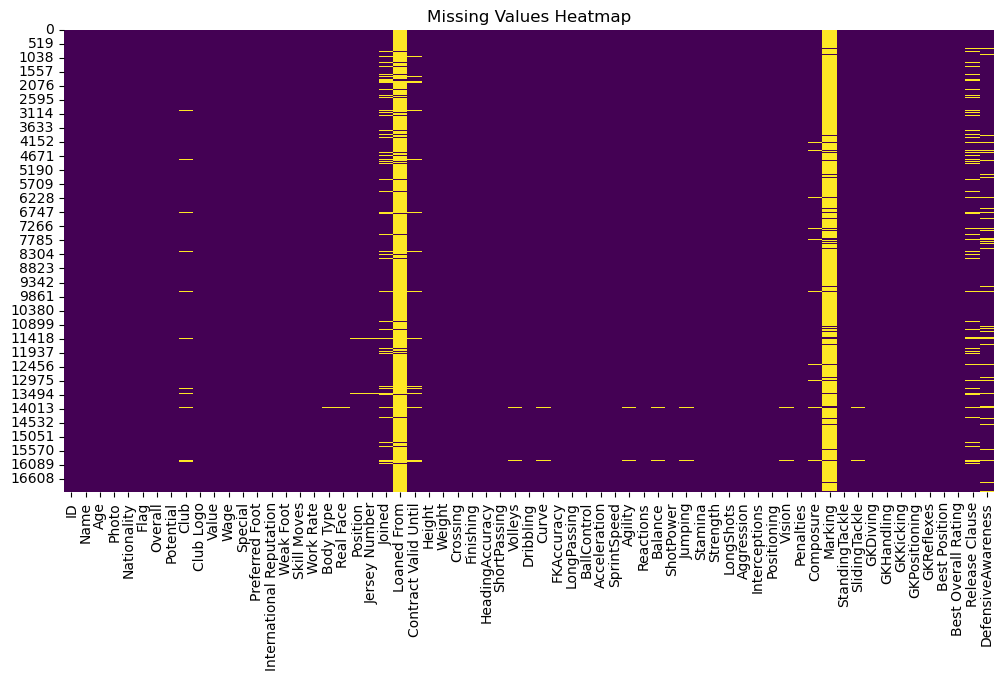

In [17]:
#heatmap of missing values shows only club has missing values of type MCAR (Missing Completely at Random)
#I want to understand the pattern of missingness, why is the data missing?
#nan values in "loaned from" column are because the player is not on loan
#nan values in "club" column are because the player is a free agent
plt.figure(figsize=(12, 6))
sns.heatmap(pandas_df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Data Cleaning

In [18]:
#dropping columns that are not useful for analysis
#these columns are images and logos links which do not add value to the analysis
col = ['Photo','Flag','Club Logo']
fifa = pandas_df.drop(columns = col, axis = 1)
fifa.shape

(17104, 62)

In [19]:
#Clean position column as it has some junk span classes data
#What is difference between position and best position?
#Convert value and wage to numeric
#What is the special column?
#Body type has easter egg values like "Messi" and "C. Ronaldo"
#Convert height and weight to numeric
#Convert work rate to categorical low, medium, high
#Convert joined date to datetime
#Find Loan Sharks from loaned from column

In [20]:
#Clean position column
import re

pattern = re.compile(r">([^<]+)$")  # capture everything between > and <

fifa["Position_clean"] = fifa["Position"].apply(
    lambda x: pattern.search(str(x)).group(1) if pd.notna(x) and pattern.search(str(x)) else None
)

print(fifa[["Position", "Position_clean", "Best Position"]].head(10))


                      Position Position_clean Best Position
0   <span class="pos pos25">ST             ST            ST
1   <span class="pos pos27">LW             LW            CF
2  <span class="pos pos18">CAM            CAM           CAM
3  <span class="pos pos13">RCM            RCM           CAM
4  <span class="pos pos15">LCM            LCM            LB
5    <span class="pos pos7">LB             LB           LWB
6  <span class="pos pos11">LDM            LDM            CM
7   <span class="pos pos20">RF             RF           CDM
8   <span class="pos pos6">LCB            LCB            CB
9  <span class="pos pos28">SUB            SUB            CB


In [21]:
#Number of players where Position != Best Position: 115
diff_df = fifa[fifa['Position_clean'] != fifa['Best Position']]
print(f"Number of players where Position != Best Position: {len(diff_df)}")
print(diff_df[['Name', 'Position_clean', 'Best Position']].head(10))

Number of players where Position != Best Position: 14862
              Name Position_clean Best Position
1     A. Griezmann             LW            CF
3     K. De Bruyne            RCM           CAM
4         M. Acuña            LCM            LB
5      Alex Telles             LB           LWB
6         Paulinho            LDM            CM
7    R. Nainggolan             RF           CDM
8         D. Alaba            LCB            CB
9         A. Vidal            SUB            CB
10       L. Modrić            RCM            CM
12    G. Wijnaldum            LCM            CM


In [22]:
#Convert value and wage to numeric
def convert(df_value):
    try:
        # If already a float or int, return as is
        if isinstance(df_value, (float, int)):
            return df_value
        # If not a string, return 0
        if not isinstance(df_value, str):
            return 0
        # Remove currency symbol and commas
        s = df_value.replace('€', '').replace(',', '').strip().upper()
        if s == '':
            return 0
        # Handle suffix
        if s[-1] == 'M':
            value = float(s[:-1]) * 1_000_000
        elif s[-1] == 'K':
            value = float(s[:-1]) * 1_000
        else:
            value = float(s)
    except Exception:
        value = 0
    return value

fifa['Value'] = fifa['Value'].apply(convert)
fifa['Wage'] = fifa['Wage'].apply(convert)
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Position_clean
0,176580,L. Suárez,32,Uruguay,89,89,FC Barcelona,53000000.0,350000.0,2327,...,27.0,25.0,31.0,33.0,37.0,ST,89.0,€108.7M,57.0,ST
1,194765,A. Griezmann,28,France,89,89,FC Barcelona,69000000.0,370000.0,2299,...,14.0,8.0,14.0,13.0,14.0,CF,89.0,€141.5M,59.0,LW
2,212198,Bruno Fernandes,24,Portugal,86,89,Manchester United,56500000.0,165000.0,2299,...,12.0,14.0,15.0,8.0,14.0,CAM,87.0,€111.6M,72.0,CAM
3,192985,K. De Bruyne,28,Belgium,91,91,Manchester City,90000000.0,370000.0,2289,...,15.0,13.0,5.0,10.0,13.0,CAM,91.0,€166.5M,68.0,RCM
4,224334,M. Acuña,27,Argentina,82,82,Sporting CP,20000000.0,19000.0,2285,...,8.0,14.0,13.0,13.0,14.0,LB,82.0,€40M,79.0,LCM


In [23]:
#What is the special column?
fifa['Special'].describe()

count    17104.000000
mean      1610.653473
std        269.489489
min        571.000000
25%       1463.000000
50%       1639.000000
75%       1798.000000
max       2327.000000
Name: Special, dtype: float64

count    17104.000000
mean      1610.653473
std        269.489489
min        571.000000
25%       1463.000000
50%       1639.000000
75%       1798.000000
max       2327.000000
Name: Special, dtype: float64


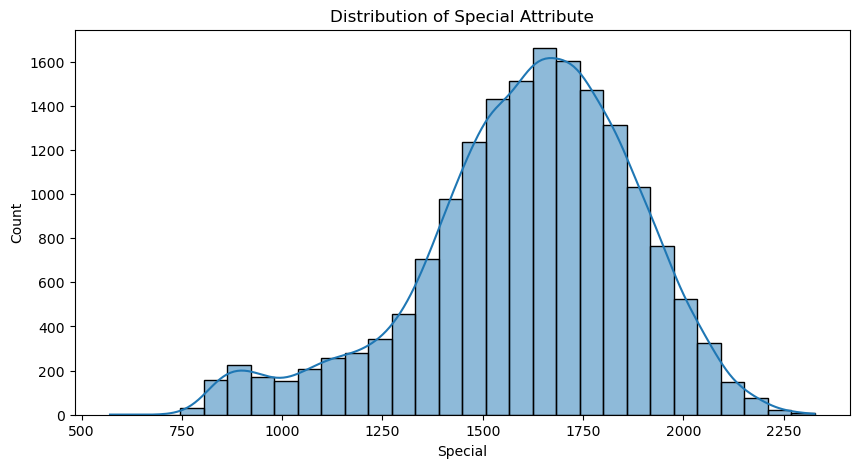

               Name  Special  Overall  Potential  \
0         L. Suárez     2327       89         89   
1      A. Griezmann     2299       89         89   
2   Bruno Fernandes     2299       86         89   
3      K. De Bruyne     2289       91         91   
4          M. Acuña     2285       82         82   
5       Alex Telles     2283       84         85   
6          Paulinho     2278       85         85   
7     R. Nainggolan     2271       84         84   
8          D. Alaba     2266       83         84   
9          A. Vidal     2264       84         84   

                             Club  
0                    FC Barcelona  
1                    FC Barcelona  
2               Manchester United  
3                 Manchester City  
4                     Sporting CP  
5                        FC Porto  
6  Guangzhou Evergrande Taobao FC  
7                        Cagliari  
8               FC Bayern München  
9                    FC Barcelona  


In [24]:
# Summary statistics for the Special column
print(fifa['Special'].describe())

# Distribution plot for Special
plt.figure(figsize=(10,5))
sns.histplot(fifa['Special'], bins=30, kde=True)
plt.title('Distribution of Special Attribute')
plt.xlabel('Special')
plt.show()

# Top 10 players by Special
top_special = fifa.nlargest(10, 'Special')[['Name', 'Special', 'Overall', 'Potential', 'Club']]
print(top_special)

In [25]:
# Special column is a column which is just like overall but with more granularity
# It ranges from 47 to 2200 with mean of 611. It is likely a composite score based on various attributes
# It helps to differentiate players with same overall rating by providing a more detailed score

In [26]:
# Body type has easter egg values like "Messi" and "C. Ronaldo"
# Unique values in Body Type column
print(fifa['Body Type'].unique())

# Find rows with Body Type as 'Messi' or 'C. Ronaldo'
easter_eggs = fifa[fifa['Body Type'].isin(['Messi', 'C. Ronaldo', 'Shaqiri', 'Neymar', 'Akinfenwa', 'Courtois'])]
print(easter_eggs[['Name', 'Body Type', 'Overall', 'Special', 'Club']])

['Normal (170-185)' 'Lean (170-185)' 'Stocky (170-185)' 'Messi'
 'Normal (185+)' 'Normal (170-)' 'C. Ronaldo' 'Lean (185+)'
 'Mohamed Salah' 'Stocky (170-)' 'Lean (170-)' 'Neymar' 'Stocky (185+)'
 'Normal (190+)' 'Shaqiri' nan 'Akinfenwa' 'Courtois']
                     Name   Body Type  Overall  Special                 Club
11               L. Messi       Messi       94     2255         FC Barcelona
21      Cristiano Ronaldo  C. Ronaldo       93     2227             Juventus
62              Neymar Jr      Neymar       92     2179  Paris Saint-Germain
352            X. Shaqiri     Shaqiri       81     2071            Liverpool
10095        A. Akinfenwa   Akinfenwa       65     1581    Wycombe Wanderers
14922         T. Courtois    Courtois       88     1319          Real Madrid


In [27]:
# Clean Body Type Feature in the dataset
def clean_body_type(body_type):
    if pd.isna(body_type):
        return np.nan
    body_type = body_type.strip()
    # List of known body types including easter eggs
    known_types = [
        'Lean', 'Normal', 'Stocky', 'Muscular', 'Average',
        'Akinfenwa', 'Messi', 'C. Ronaldo', 'Shaqiri', 'Neymar', 'Courtois'
    ]
    # Extract main type before any parenthesis or space
    import re
    main_type = re.match(r'^(\w+)', body_type)
    # If body_type matches a known type, return as is
    if body_type in known_types:
        return body_type
    # If main_type is in known types, return it
    if main_type and main_type.group(1) in known_types:
        return main_type.group(1)
    # Otherwise, return main_type or original
    if main_type:
        return main_type.group(1)
    return body_type

fifa['Body Type Clean'] = fifa['Body Type'].apply(clean_body_type)
print(fifa[['Body Type Clean', 'Body Type']].value_counts())

Body Type Clean  Body Type       
Normal           Normal (170-185)    5735
Lean             Lean (170-185)      4099
Normal           Normal (185+)       3240
Lean             Lean (185+)         1876
Normal           Normal (170-)        632
Stocky           Stocky (170-185)     586
Lean             Lean (170-)          469
Stocky           Stocky (185+)        316
                 Stocky (170-)        111
Normal           Normal (190+)          6
Akinfenwa        Akinfenwa              1
Neymar           Neymar                 1
C. Ronaldo       C. Ronaldo             1
Courtois         Courtois               1
Mohamed          Mohamed Salah          1
Messi            Messi                  1
Shaqiri          Shaqiri                1
Name: count, dtype: int64


In [28]:
fifa['Height'] = pandas_df['Height']
fifa['Weight'] = pandas_df['Weight']
print(fifa[['Height', 'Weight']].head(10))

  Height  Weight
0    6'0  190lbs
1    5'9  161lbs
2   5'10  152lbs
3   5'11  154lbs
4    5'8  152lbs
5   5'11  157lbs
6    6'0  176lbs
7    5'9  143lbs
8   5'11  172lbs
9   5'11  165lbs


In [29]:
def height_conversion(height):
    try:
        if pd.isna(height):
            return np.nan
        # Remove spaces and handle strings like "5'9"
        height_str = str(height).replace(" ", "")
        if "'" in height_str:
            ft, inch = height_str.split("'")
            ft = float(ft)
            inch = float(inch) if inch else 0
        else:
            # If only feet provided, no inches
            ft = float(height_str)
            inch = 0
        total_cm = (ft * 12 + inch) * 2.54
        return total_cm
    except Exception:
        return np.nan

fifa['Height'] = fifa['Height'].apply(height_conversion)
fifa['Height'] = fifa['Height'].fillna(fifa['Height'].mean())
print(fifa['Height'].head())

0    182.88
1    175.26
2    177.80
3    180.34
4    172.72
Name: Height, dtype: float64


In [30]:
value = float(fifa['Weight'][0][0:-3])*0.453592
print('%0.2f'%value)

#in kg
def weight_conversion(weight):
    if(pd.isna(weight))!= True:
        w = int(weight[0:-3])*0.453592
        return w
    else:
        return weight

fifa['Weight'] = fifa['Weight'].apply(weight_conversion)

fifa['Weight'] = fifa['Weight'].fillna(value = fifa['Weight'].mean())

fifa['Weight'][13230:13239]

86.18


13230    69.853168
13231    64.863656
13232    78.017824
13233    68.945984
13234    72.121128
13235    71.213944
13236    74.842680
13237    64.863656
13238    69.853168
Name: Weight, dtype: float64

In [31]:
#Convert height and weight to numeric, i.e into cms and kgs respectfully
print(fifa[['Height', 'Weight']].head(10))

   Height     Weight
0  182.88  86.182480
1  175.26  73.028312
2  177.80  68.945984
3  180.34  69.853168
4  172.72  68.945984
5  180.34  71.213944
6  182.88  79.832192
7  175.26  64.863656
8  180.34  78.017824
9  180.34  74.842680


In [32]:
fifa['Joined'] = pandas_df['Joined']

In [33]:
#Convert joined date to datetime
def date_conversion(date):
    if pd.isna(date):
        return np.nan
    if isinstance(date, str):
        try:
            # Try parsing with pandas to_datetime, dayfirst for European format
            dt = pd.to_datetime(date, errors='coerce', dayfirst=True)
            if pd.isna(dt):
                # Try parsing with common formats manually
                for fmt in ['%b %d, %Y', '%d %b %Y', '%Y-%m-%d', '%d/%m/%Y', '%m/%d/%Y']:
                    try:
                        dt = pd.to_datetime(date, format=fmt, errors='coerce')
                        if not pd.isna(dt):
                            return dt
                    except Exception:
                        continue
            return dt
        except Exception:
            return np.nan
    return np.nan

fifa['Joined'] = fifa['Joined'].apply(date_conversion)
print(fifa['Joined'].head(10))

0   2014-07-11
1   2019-07-12
2   2020-01-30
3   2015-08-30
4          NaT
5   2016-07-13
6   2019-01-15
7          NaT
8   2010-02-10
9   2018-08-06
Name: Joined, dtype: datetime64[ns]


In [34]:
#Convert work rate to categorical low, medium, high
def work_rate_conversion(rate):
    if pd.isna(rate):
        return (np.nan, np.nan)
    if isinstance(rate, str) and '/' in rate:
        try:
            attack, defense = rate.split('/')
            return (attack.strip(), defense.strip())
        except Exception:
            return (np.nan, np.nan)
    return (np.nan, np.nan)

fifa[['Attacking Work Rate', 'Defensive Work Rate']] = fifa['Work Rate'].apply(work_rate_conversion).apply(pd.Series)
fifa[['Work Rate', 'Attacking Work Rate', 'Defensive Work Rate']].head(10)

,Work Rate,Attacking Work Rate,Defensive Work Rate
0,High/ Medium,High,Medium
1,High/ High,High,High
2,High/ High,High,High
3,High/ High,High,High
4,High/ High,High,High
5,High/ High,High,High
6,High/ High,High,High
7,High/ High,High,High
8,Medium/ Medium,Medium,Medium
9,High/ High,High,High


In [35]:
#Clean the loaned from column
import re

pattern = re.compile(r">(.*?)<")  # capture everything between > and <

fifa["Loaned From_clean"] = fifa["Loaned From"].apply(
    lambda x: pattern.search(str(x)).group(1) if pd.notna(x) and pattern.search(str(x)) else None
)

print(fifa[["Loaned From", "Loaned From_clean"]].head(10))

#it will show Nan/None for players who are not on loan
#other unique values are clubs from which players are loaned come later up in the dataset

                           Loaned From Loaned From_clean
0                                  NaN              None
1                                  NaN              None
2                                  NaN              None
3                                  NaN              None
4                                  NaN              None
5                                  NaN              None
6                                  NaN              None
7  <a href="/team/44/inter/">Inter</a>             Inter
8                                  NaN              None
9                                  NaN              None


In [36]:
#Find Loan Sharks from loaned from column
fifa['Loaned From_clean'].value_counts().head(10)

Loaned From_clean
Inter         19
Atalanta      19
Napoli        19
SL Benfica    18
Fiorentina    18
Roma          16
Lazio         16
Sassuolo      15
Sevilla FC    15
Juventus      14
Name: count, dtype: int64

## Final Fifa Dataset Looks like

In [37]:
# Drop Work Rate, body Type, Position, Loaned From as we cleaned them and have better dataset columns now
cols_to_drop = ['Work Rate', 'Body Type', 'Position', 'Loaned From']
fifa = fifa.drop(columns=cols_to_drop)
print(fifa.columns)

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Real Face',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness', 'Position_clean', 'Body Type Clean',
       'Attacking Work Rate', 'Defensive Work Rate', 'Loaned From_clean'],
  

In [38]:
fifa.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Position_clean,Body Type Clean,Attacking Work Rate,Defensive Work Rate,Loaned From_clean
0,176580,L. Suárez,32,Uruguay,89,89,FC Barcelona,53000000.0,350000.0,2327,...,37.0,ST,89.0,€108.7M,57.0,ST,Normal,High,Medium,None
1,194765,A. Griezmann,28,France,89,89,FC Barcelona,69000000.0,370000.0,2299,...,14.0,CF,89.0,€141.5M,59.0,LW,Normal,High,High,None
2,212198,Bruno Fernandes,24,Portugal,86,89,Manchester United,56500000.0,165000.0,2299,...,14.0,CAM,87.0,€111.6M,72.0,CAM,Lean,High,High,None
3,192985,K. De Bruyne,28,Belgium,91,91,Manchester City,90000000.0,370000.0,2289,...,13.0,CAM,91.0,€166.5M,68.0,RCM,Normal,High,High,None
4,224334,M. Acuña,27,Argentina,82,82,Sporting CP,20000000.0,19000.0,2285,...,14.0,LB,82.0,€40M,79.0,LCM,Stocky,High,High,None
5,212462,Alex Telles,26,Brazil,84,85,FC Porto,31500000.0,23000.0,2283,...,14.0,LWB,85.0,€65.4M,80.0,LB,Lean,High,High,None
6,187961,Paulinho,30,Brazil,85,85,Guangzhou Evergrande Taobao FC,35500000.0,47000.0,2278,...,8.0,CM,85.0,€56.8M,80.0,LDM,Normal,High,High,None
7,178518,R. Nainggolan,31,Belgium,84,84,Cagliari,27500000.0,57000.0,2271,...,11.0,CDM,85.0,NaN,83.0,RF,Stocky,High,High,Inter
8,197445,D. Alaba,27,Austria,83,84,FC Bayern München,26000000.0,110000.0,2266,...,9.0,CB,83.0,€44.9M,83.0,LCB,Lean,Medium,Medium,None
9,181872,A. Vidal,32,Chile,84,84,FC Barcelona,23500000.0,200000.0,2264,...,4.0,CB,85.0,€48.2M,82.0,SUB,Normal,High,High,None


In [39]:
skim(fifa)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17104  │ │ float64     │ 44    │                                                          │
│ │ Number of columns │ 63     │ │ string      │ 13    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 5     │                                                          │
│                                │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column    ┃ NA    ┃ NA %      ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75     ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ ID        │     0 │         0 │  222100 │   33360 │    16 │ 210400 │ 230300 │  243600 │    256500 │     ▃▇ │  │
│ │ Age       │     0 │         0 │   24.17 │   4.744 │    16 │     20 │     23 │      27 │        47 │  ▇▇▅▂  │  │
│ │ Overall   │     0 │         0 │   66.42 │   7.378 │    28 │     61 │     66 │      72 │        94 │   ▃▇▃  │  │
│ │ Potential │     0 │         0 │   72.41 │   6.094 │    38 │     68 │     72 │      76 │        95 │   ▃▇▅  │  │
│ │ Value     │     0 │         0 │ 2721000 │ 5854000 │     0 │ 325000 │ 775000 │ 2600000 │ 105500000 │   ▇    │  │
│ │ Wage      │     0 │         0 │   10190 │   22200 │     0 │   1000 │   3000 │   10000 │    560000 │   ▇    │  │
│ │ Special   │     0 │         0 │    1611 │   269.5 │   571 │   1463 │   1639 │    1798 │      2327 │  ▁▃▇▅▁ │  │
│ │ Internati │     0 │         0 │    1.14 │  0.4472 │     1 │      1 │      1 │       1 │         5 │   ▇▁   │  │
│ │ onal      │       │           │         │         │       │        │        │         │           │        │  │
│ │ Reputatio │       │           │         │         │       │        │        │         │           │        │  │
│ │ n         │       │           │         │         │       │        │        │         │           │        │  │
│ │ Weak Foot │     0 │         0 │   2.966 │  0.6648 │     1 │      3 │      3 │       3 │         5 │  ▃ ▇▂  │  │
│ │ Skill     │     0 │         0 │    2.42 │  0.7751 │     1 │      2 │      2 │       3 │         5 │ ▂▇ ▆▁  │  │
│ │ Moves     │       │           │         │         │       │        │        │         │           │        │  │
│ │ Jersey    │    19 │ 0.1110851 │   21.66 │   17.51 │     1 │      9 │     19 │      28 │        99 │  ▇▆▂   │  │
│ │ Number    │       │ 262862488 │         │         │       │        │        │         │           │        │  │
│ │           │       │         4 │         │         │       │        │        │         │           │        │  │
│ │ Height    │     0 │         0 │     181 │   6.832 │ 154.9 │  175.3 │  180.3 │   185.4 │     205.7 │  ▁▆▇▂  │  │
│ │ Weight    │     0 │         0 │    74.9 │   7.092 │  49.9 │  69.85 │  74.84 │   79.83 │     110.2 │   ▅▇▃  │  │
│ │ Crossing  │     0 │         0 │   50.71 │   18.01 │     6 │     39 │     55 │      64 │        94 │ ▂▃▅▇▅  │  │
│ │ Finishing │     0 │         0 │   47.05 │   19.45 │ 

## Graphs(temp)

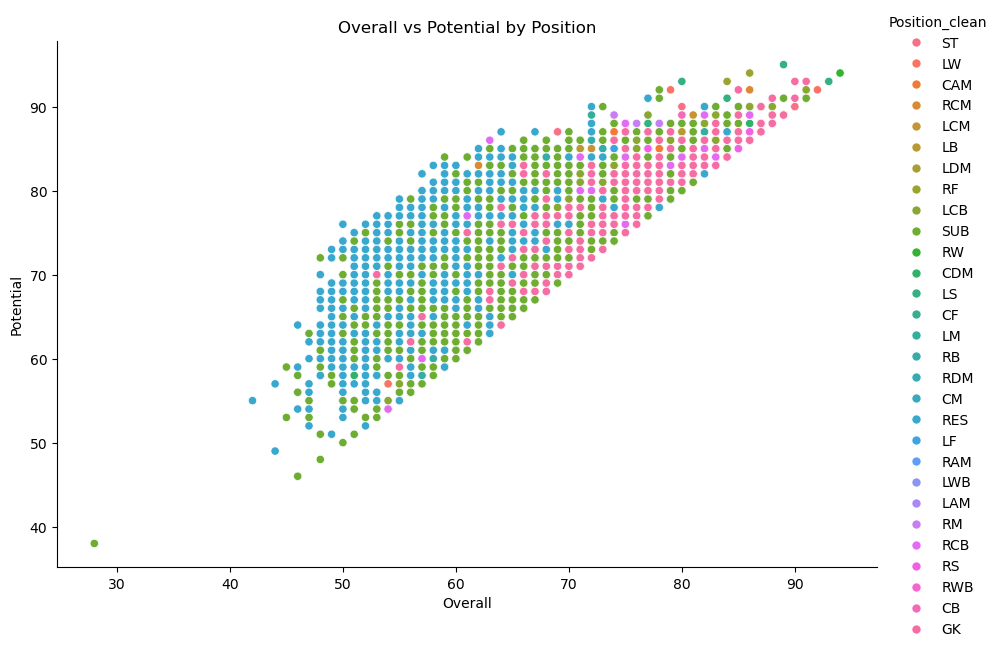

In [40]:
sns.relplot(data=fifa, x='Overall', y='Potential', hue='Position_clean', kind='scatter', height=6, aspect=1.5)
plt.title('Overall vs Potential by Position')
plt.show()

In [41]:
#highest potential players
top_potential = pandas_df.nlargest(10, 'Potential')[['Name', 'Overall', 'Potential', 'Club', 'Wage']]
print("Top 10 Players by Potential:")
print(top_potential)

Top 10 Players by Potential:
                     Name  Overall  Potential                 Club   Wage
136             K. Mbappé       89         95  Paris Saint-Germain  €150K
11               L. Messi       94         94         FC Barcelona  €560K
1100            J. Sancho       86         94    Borussia Dortmund   €72K
21      Cristiano Ronaldo       93         93             Juventus  €410K
529            João Félix       80         93      Atlético Madrid   €38K
570            K. Havertz       84         93  Bayer 04 Leverkusen   €70K
13260       M. ter Stegen       90         93         FC Barcelona  €250K
13777            J. Oblak       91         93      Atlético Madrid  €125K
45             F. de Jong       86         92         FC Barcelona  €210K
62              Neymar Jr       92         92  Paris Saint-Germain  €290K


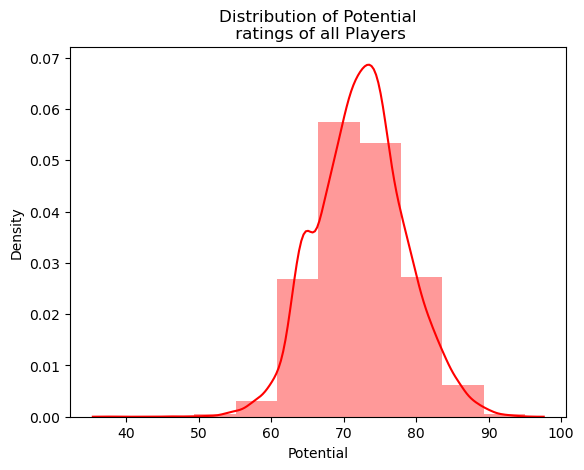

In [42]:
# Distribution of Potential ratings
sns.distplot(fifa['Potential'], bins=10, color='r')
plt.title("Distribution of Potential\n ratings of all Players")
plt.savefig("Distribution.png")
plt.show()

In [43]:
#highest overall players
top_overall = pandas_df.nlargest(10, 'Overall')[['Name', 'Overall', 'Potential', 'Club', 'Wage']]
print("Top 10 Players by Overall:")
print(top_overall)

Top 10 Players by Overall:
                     Name  Overall  Potential                 Club   Wage
11               L. Messi       94         94         FC Barcelona  €560K
21      Cristiano Ronaldo       93         93             Juventus  €410K
62              Neymar Jr       92         92  Paris Saint-Germain  €290K
3            K. De Bruyne       91         91      Manchester City  €370K
69         R. Lewandowski       91         91    FC Bayern München  €300K
120             E. Hazard       91         91          Real Madrid  €470K
201           V. van Dijk       91         92            Liverpool  €240K
13777            J. Oblak       91         93      Atlético Madrid  €125K
30               M. Salah       90         90            Liverpool  €240K
35                S. Mané       90         90            Liverpool  €240K


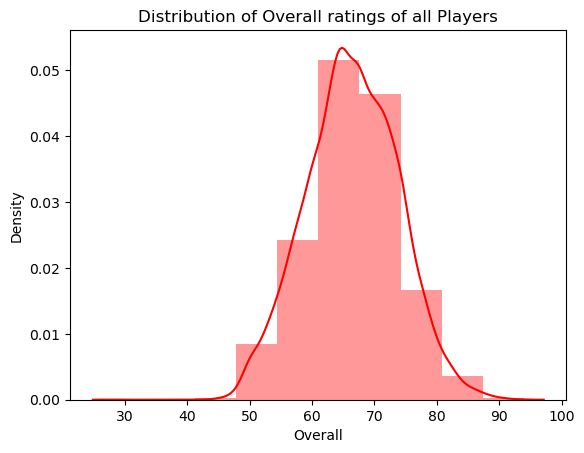

In [44]:
# Distribution of Overall ratings
sns.distplot(fifa['Overall'], bins=10, color='r')
plt.title("Distribution of Overall ratings of all Players")
plt.savefig("Distribution.png")
plt.show()

In [45]:
# Save the final dataframe to a CSV file
fifa.to_csv('fifa_dataset_cleaned/fifa_final20.csv', index=False)